<a href="https://colab.research.google.com/github/Ksenia-90/Data_analysis_algorithms/blob/lesson_3/lesson_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Урок 3. Классификация. Логистическая регрессия.

## Домашнее задание

1. Измените функцию predict(w, X) так, чтобы можно было подать порог для классификации.
2. Подберите аргументы функции optimize для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
4. Постройте кривую оббучения (значение оценки потерь от итерации) для примеров из тренировочной и тестовой выборки
5. Оцените результаты и сделайте выводы. 
6. Попробуйте ответить на вопросы: Могла ли модель переобучиться? На каком шаге это произошло? Почему?



In [16]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

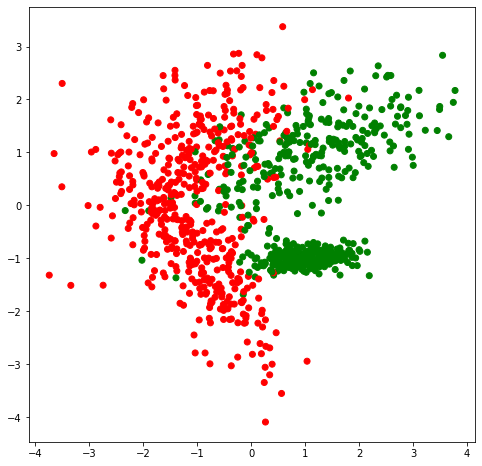

In [17]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=110)
# 

#classes = datasets.make_blobs(n_samples=1000,centers = 2, cluster_std = 1., random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [18]:
print(type(classes[0][0]))

<class 'numpy.ndarray'>


In [19]:
 def sigmoid(x):
      return 1/(1 + np.exp(-x))

In [20]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.9
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (900, 2)
Размер массива признаков тестовой выборки (100, 2)
Размер массива ответов для обучающей выборки (900,)
Размер массива ответов для тестовой выборки (100,)


In [21]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [22]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [23]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

**1.Измените функцию predict(w, X) так, чтобы можно было подать порог для классификации.**

In [24]:
def predict(w, X, threshold = 0.5):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > threshold): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= threshold):
            y_predicted[:, i] = 0
    
    return y_predicted

**2.Подберите аргументы функции optimize для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [25]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))-1

n_iterations = 100
eta = 1
for eta in [0.1,1,10]:
  for n_iterations in [1,10,100]:
      w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta) #Gthdjyfxfkmyfz!!!!!
      TP = 0
      train_accurancy = 0
      for ilevel in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        y_predicted_train = predict(w, X_train_tr, ilevel)
        if train_accurancy < (100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)):
          tp = ilevel

      y_predicted_test = predict(w, X_test_tr) #!!!!!!! предсказание 
      y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
      train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
      test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

      print(f"Итоговый вектор весов w: {w}")
      print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
      print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
      print(f"Колличество иттераций: {n_iterations}")
      print(f"eta: {eta}")

Итоговый вектор весов w: [[-0.92092798]
 [-0.9745062 ]]
Точность на обучающей выборке: 29.444
Точность на тестовой выборке: 25.000
Колличество иттераций: 1
eta: 0.1
Итоговый вектор весов w: [[-0.28213407]
 [-0.7440215 ]]
Точность на обучающей выборке: 46.556
Точность на тестовой выборке: 40.000
Колличество иттераций: 10
eta: 0.1
Итоговый вектор весов w: [[ 1.58651922]
 [-0.08998957]]
Точность на обучающей выборке: 88.556
Точность на тестовой выборке: 88.000
Колличество иттераций: 100
eta: 0.1
Итоговый вектор весов w: [[-0.20927981]
 [-0.74506198]]
Точность на обучающей выборке: 48.222
Точность на тестовой выборке: 41.000
Колличество иттераций: 1
eta: 1
Итоговый вектор весов w: [[ 1.67314573]
 [-0.07358277]]
Точность на обучающей выборке: 89.000
Точность на тестовой выборке: 88.000
Колличество иттераций: 10
eta: 1
Итоговый вектор весов w: [[ 2.82769963]
 [-0.00290988]]
Точность на обучающей выборке: 89.111
Точность на тестовой выборке: 89.000
Колличество иттераций: 100
eta: 1
Итоговый в

**3.Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [26]:
def function_count(y_predicted, y_predicted_train):

  TP = len(y_predicted[(y_predicted == y_predicted_train) & (y_predicted_train == 1)])
  FN = len(y_predicted[(y_predicted == y_predicted_train ) & (y_predicted_train == 0)])
  FP = len(y_predicted[(y_predicted == y_predicted_train ) & (y_predicted_train == 1)])
  TN = len(y_predicted[(y_predicted == y_predicted_train ) &(y_predicted_train == 0)])
  return TP, FN, FP, TN

In [27]:
def function_accuracy(TP, FN, FP, TN ):
    return(TN + TP)/(TP + FN + FP + TN)

In [28]:
def function_recall(TP, FN):
    return TP /(TP + FN)

In [29]:
def function_precision(TP,FP):
    return TP /(TP + FP)

In [30]:
def function_f1_score(recall,precision):
    return 2 * recall * precision / (recall+precision)


In [31]:
def matrixs(y_true, y_predicted):
   TP, FN, FP, TN = function_count(y_true, y_predicted)
   matr = [[TP, FP], [FN, TN]]
   print(matr)
   accuracy = function_accuracy(TP, FN, FP, TN )
   recall = function_recall(TP, FN)
   precision = function_precision(TP, FP)
   function_f1_score(recall,precision)
   print(f'accuracy: {accuracy}')
   print(f'precision: {precision}')
   print(f'recall: {recall}')
   print(f'function_f1_score: {recall,precision}')

In [32]:
import pandas as pd
def show_predict(w, X,y_predicted_train,y_train_tr):
    y_pred_log= sigmoid(np.dot(w.T,  X_train_tr))
    N = 80
    plt.figure(figsize = (16,5))
    plt.subplot(1,2,1)
    plt.plot(y_predicted_train[0,:N],'r', label = 'true')
    plt.plot(y_train_tr[0,:N],'--', label = 'class predict')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(y_predicted_train[0,:N],'r', label = 'true')
    plt.plot(y_pred_log[0,:N],'--',label = 'log predict')
    plt.legend()

    plt.show()

[[42, 42], [47, 47]]
accuracy: 0.5
precision: 0.5
recall: 0.47191011235955055
function_f1_score: (0.47191011235955055, 0.5)


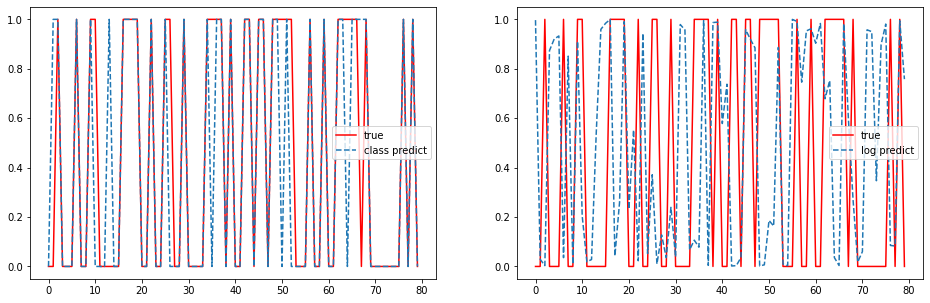

In [33]:
matrixs(y_test_tr[0], y_predicted_test[0])
show_predict(w, X_test_tr, y_predicted_test, y_test_tr)

[[410, 410], [392, 392]]
accuracy: 0.5
precision: 0.5
recall: 0.5112219451371571
function_f1_score: (0.5112219451371571, 0.5)


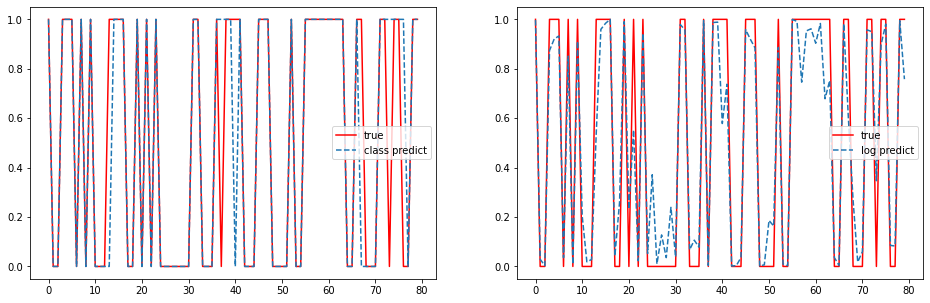

In [34]:
matrixs(y_train_tr, y_predicted_train)
show_predict(w, X_train_tr, y_predicted_train, y_train_tr)

**4.Постройте кривую оббучения (значение оценки потерь от итерации) для примеров из тренировочной и тестовой выборки**

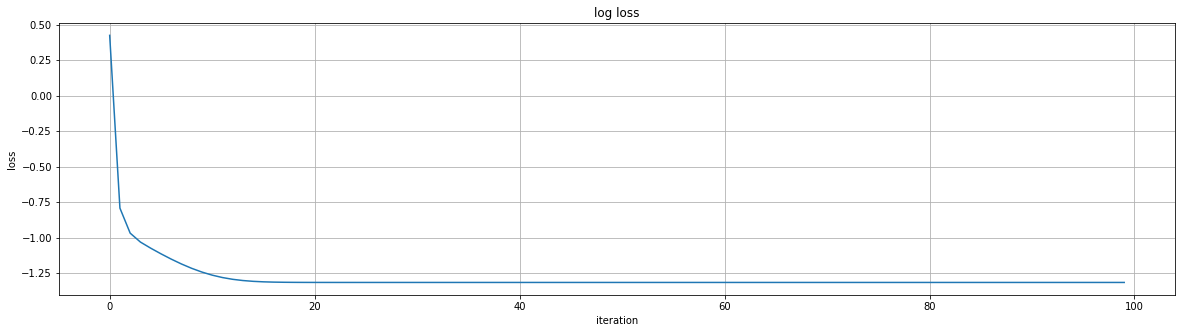

In [35]:
plt.figure(figsize = (20,5))
plt.title('log loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(len(losses)), np.log(losses))
plt.grid(True)

In [36]:
from numpy import trapz  # используем эту функцию для расчета площади под кривой

def funktion_FPR(FP, TN):
  return  FP / (FP + TN)

def funktion_TPR(TP, FN):
  return  TP / (TP + FN)
def funktion_TPR_FPR(y_true, y_predicted):
  TP, FN, FP, TN = function_count(y_true, y_predicted)

  return funktion_FPR(FP, TN),funktion_TPR(TP, FN)
def ROC (w, X, y_true):

    TPR = []
    FPR = []
    for i in np.linspace(0,1,100).tolist():
      y_predicted_test = predict(w, X, i)

      TPR, FPR = funktion_TPR_FPR(y_true[0], y_predicted_test[0])

      TPR.append(TP/(TP+FN))
      FPR.append(FP/(FP+TN))

    AUC_ROC = trapz(TPR, x = FPR, dx=0.1)

    plt.title('ROC curve')
    plt.ylim(0, 1.05)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
    plt.plot(FPR, TPR)

**5.Оцените результаты и сделайте выводы.**
*AUC ROC не годится для задач с сильным дисбалансом классов. Чем выше показатель AUC, тем качественнее постоен алгоритм.AUC = 0,5 демонстрирует непригодность выбранного метода классификации.

**6 Попробуйте ответить на вопросы: Могла ли модель переобучиться? На каком шаге это произошло? Почему?**
* Модель может переучится. много зависит ок количества исследуемых данных.


